# HW3 - Random Forest
##### 負責助教：張逸群 toosyou.tw@gmail.com

這次的作業將帶大家建立食譜分類器，用食譜的成分預測此份食譜是屬於哪種類別

## 資料簡介
Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

## 評分標準
### 原始分數
* 上課繳交：20%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
    * 並填寫表單上傳程式執行結果
        * 請上傳 .html 檔案至表單
        * __請統一檔名 <學號>-<姓名>.html__
        * [表單連結](https://docs.google.com/forms/d/e/1FAIpQLSdlbNU_u9kb1QpCdXsgX42gx6UcRYCtVnX4E0xVlkjYyEOgug/viewform)
* 程式分數：80%

### 調整分數
* 你的調整分數 = (你的原始分數 - 全部人原始分數平均) x (15. / 全部人原始分數標準差) + 80.


#### 姓名：（點兩下編輯我）
#### 學號：（點兩下編輯我）

## Packages that Might Be Used

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import difflib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [re](https://docs.python.org/zh-cn/3/library/re.html)
    * [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    * [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    * [difflib](https://docs.python.org/2/library/difflib.html)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html)
    * [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

### Package 解釋 - 10%

請__簡述__以下問題，將 __ans__ 取代為你的答案

1. CountVectorizer 和 LabelEncoder 的用途各自為何？  - 5%
    * ans
2. 以上兩種有什麼區別？ - 5%
    * ans

## Load Data - 10%

#### 請使用 pandas 套件，讀取 data.json 檔案成 DataFrame 並取名為 df

In [2]:
df = '''Your Code Here'''

#### 請將 df 前五個 __row__ 印出來 - 5%

In [3]:
'''Your Code Here'''

cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

#### 請將 df row 的數量印出來 - 5%

In [4]:
'''Your Code Here'''

cuisine        39774
id             39774
ingredients    39774
dtype: int64

## Statistics - 20%

### Target Value Frequency

#### 請將 df 的 cuisine 的 value frequency 印出 - 5%

In [5]:
'''Your Code Here'''

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

#### 請將 df 的 cuisine 的 value frequency 以圓餅圖（pie chart）方式畫出 - 5%
Hint - Pandas 有內建畫圖功能

In [6]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der
'''Your Code Here'''

### Ingredients Length Count

這邊需要注意的是 ```df.ingredients``` 中各個 row 是以 ```list``` 的形式儲存

In [7]:
df.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

#### Hint - 印出每個 instance（row） 中的 ingredient 個數

In [8]:
df.ingredients.str.len().head()

0     9
1    11
2    12
3     4
4    20
Name: ingredients, dtype: int64

#### 請統計 instance（row） 中的 ingredient 個數的 frequency count，後以 ingredient 個數做排序以長條圖（bar chart）畫出 - 10%

In [9]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der
'''Your Code Here'''

Text(0, 0.5, 'Count of recipes')

## Preprocessing - 15%

#### 為ㄌ體恤各位辛勞，ingredients 前處理的部份小ㄉ幫大家處理完ㄌ
* 4 否覺得ㄗˋ教很 bon [Y/n] - 0%
    * ans

In [10]:
def preprocessing(item):
    newitem = []
    for ingr in item:
        ingr.lower()
        ingr = re.sub("[^a-zA-Z]"," ",ingr)
        ingr = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', ingr)
        newitem.append(ingr)
    return newitem

ingredients_processed = df.ingredients.apply(preprocessing)

#### Q&A - 5%

* 請問上面這個 block 做了什麼事情呢？
    * ans
* 請問「(1.5 oz.) Tomato Sauce」將變成什麼呢？
    * ans
* [Hint](https://zh.wikipedia.org/wiki/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F)

In [11]:
X = [str(i) for i in ingredients_processed]
y = df.cuisine # 此菜屬於哪種種類，此為我們的預測目標

#### 接者請使用 LabelEncoder / CounterVectorizer 將 X 和 Y 進行 encode，並依格式印出第一個 instance 的資訊 - 5%

In [12]:
'''Your Code Here'''

In [13]:
print('Original:')
'''Your Code Here'''

print('Encoded:')
'''Your Code Here'''

print('Inverse Transformed:')
'''Your Code Here'''

Original:
['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Encoded:
  (0, 728)	1
  (0, 512)	1
  (0, 948)	1
  (0, 174)	1
  (0, 1078)	1
  (0, 2389)	1
  (0, 1861)	1
  (0, 2169)	1
  (0, 1985)	1
  (0, 1084)	1
  (0, 2757)	1
  (0, 1159)	1
  (0, 1857)	1
  (0, 237)	1
  (0, 1514)	1
  (0, 2281)	1
Inverse Transformed:
[array(['crumbles', 'cheese', 'feta', 'beans', 'garbanzo', 'seasoning',
       'onion', 'purple', 'pepper', 'garlic', 'tomatoes', 'grape',
       'olives', 'black', 'lettuce', 'romaine'], dtype='<U16')]


#### 從 X_encoder 中取得 Unique Ingredents & 從 y_encoder 中取得 Unique Classes - 5%

In [14]:
all_unique_ingredients = '''Your Code Here'''
all_unique_classes = '''Your Code Here'''

In [15]:
all_unique_ingredients[:10]

['abalone',
 'abbamele',
 'absinthe',
 'abura',
 'acai',
 'accent',
 'accompaniment',
 'achiote',
 'acid',
 'acini']

In [16]:
all_unique_classes

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

## Training - 15%

#### 請將資料以 7:3 比例分為 training / testing set，random_state 請給 42 - 0%

In [17]:
X_train, X_test, y_train, y_test = '''Your Code Here'''

#### 請建 Decision Tree 和 Random Forest 共兩個分類器，分別訓練後將各自 Confusion Matrix 畫出，並將各自 Accuracy, Classification Report 印出 - 10%

Hint - 以下 function 取自[連結](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)，可以將 confusion matrix 畫出

In [18]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

#### Decision Tree

In [19]:
dt_clf = '''Your Code Here'''
'''Your Code Here'''

print('Accuracy:', '''Your Code Here''')
print('''Your Code Here''')

Confusion matrix, without normalization


Accuracy: 0.6323640325148747
              precision    recall  f1-score   support

   brazilian       0.49      0.49      0.49       147
     british       0.38      0.32      0.35       242
cajun_creole       0.59      0.53      0.56       495
     chinese       0.68      0.68      0.68       760
    filipino       0.38      0.42      0.40       200
      french       0.43      0.45      0.44       820
       greek       0.55      0.56      0.56       354
      indian       0.74      0.72      0.73       899
       irish       0.39      0.37      0.38       207
     italian       0.74      0.77      0.75      2351
    jamaican       0.45      0.47      0.46       135
    japanese       0.60      0.58      0.59       443
      korean       0.63      0.59      0.61       249
     mexican       0.81      0.82      0.81      1957
    moroccan       0.48      0.49      0.48       237
     russian       0.22      0.17      0.19       144
 southern_us       0.56      0.58      0.57      128

#### Random Forest

Confusion matrix, without normalization


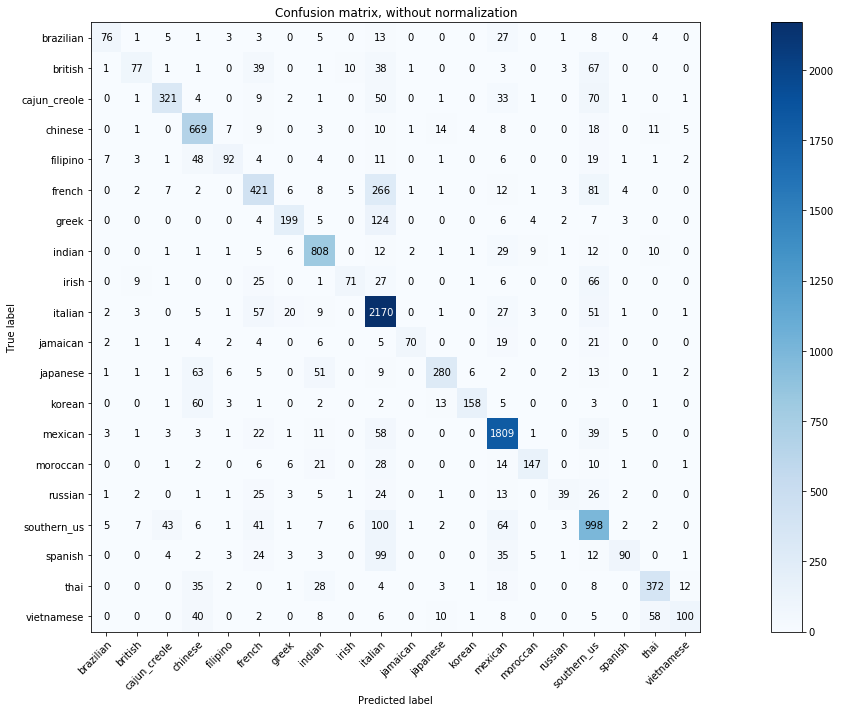

Accuracy: 0.7514455711053382
              precision    recall  f1-score   support

   brazilian       0.78      0.52      0.62       147
     british       0.71      0.32      0.44       242
cajun_creole       0.82      0.65      0.72       495
     chinese       0.71      0.88      0.78       760
    filipino       0.75      0.46      0.57       200
      french       0.60      0.51      0.55       820
       greek       0.80      0.56      0.66       354
      indian       0.82      0.90      0.86       899
       irish       0.76      0.34      0.47       207
     italian       0.71      0.92      0.80      2351
    jamaican       0.92      0.52      0.66       135
    japanese       0.85      0.63      0.73       443
      korean       0.92      0.63      0.75       249
     mexican       0.84      0.92      0.88      1957
    moroccan       0.86      0.62      0.72       237
     russian       0.71      0.27      0.39       144
 southern_us       0.65      0.77      0.71      128

In [20]:
rf_clf = '''Your Code Here'''
'''Your Code Here'''

print('Accuracy:', '''Your Code Here''')
print('''Your Code Here''')

#### Q&A - 5%
* 你為什麼選擇這樣的參數？
    * ans
* 哪種菜的預測效果最好？
    * ans

## Prediction - 10%

#### 現在你有一個訓練完的 Random Forest Model 了，現在我們希望你對一道菜進行預測：

1. 請到[愛料理](https://icook.tw/?ref=logo)找尋一道你喜歡的菜 __（不可以是「古早味香菇肉燥」）__
2. 將以下內容改成你的那道菜
3. 以 ```rf_clf``` 進行預測
4. 請問預測是否正確？你認為為什麼？
    * ans

### [古早味香菇肉燥](https://icook.tw/recipes/289148)
![古早味香菇肉燥](https://tokyo-kitchen.icook.network/uploads/recipe/cover/289148/large_5a4543391650997b.jpg)

#### 食材
* 粗絞肉
* 乾香菇
* 水煮蛋
* 鵪鶉蛋
* 醬油
* 冰糖
* 黑豆醬油（可省略）
* 紹興酒
* 小磨坊濃香五香粉
* 水
* 胡椒粉

#### 自行翻譯成類似ㄉ英文
* ground meat
* dried mushrooms
* boiled egg
* quil egg
* bean sauce
* rock sugar
* shaoxing wine
* allspice
* water
* peper

In [21]:
to_predict_X = X_encoder.transform(['quil egg ground meat boiled egg dried mushrooms bean sauce shaoxing wine water peper allspice rock sugar'])

In [22]:
print(to_predict_X)
print(X_encoder.inverse_transform(to_predict_X))

  (0, 37)	1
  (0, 173)	1
  (0, 266)	1
  (0, 851)	1
  (0, 882)	2
  (0, 1194)	1
  (0, 1655)	1
  (0, 1773)	1
  (0, 2272)	1
  (0, 2360)	1
  (0, 2419)	1
  (0, 2633)	1
  (0, 2909)	1
  (0, 2941)	1
[array(['allspice', 'bean', 'boiled', 'dried', 'egg', 'ground', 'meat',
       'mushrooms', 'rock', 'sauce', 'shaoxing', 'sugar', 'water', 'wine'],
      dtype='<U16')]


In [23]:
y_encoder.inverse_transform(rf_clf.predict(to_predict_X))

array(['chinese'], dtype=object)

#### Hint - 可以使用以下指令在 all_unique_ingredients 查詢類似的字串

In [24]:
difflib.get_close_matches('bean sauce', all_unique_ingredients)

['sauce', 'beans', 'sauces']

## Ｕ迷Ｕ想對ㄗˋ教說ㄉ話 - 0%